In [ ]:
决策树模型函数说明
ecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None, class_weight=None)
criterion：用于指定选择节点字段的评价指标，对于分类决策树，默认为'gini'，表示采用基尼指数选择节点的最佳分割字段；
           对于回归决策树，默认为'mse'，表示使用均方误差选择节点的最佳分割字段
splitter：用于指定节点中的分割点选择方法，默认为'best'，表示从所有的分割点中选择最佳分割点；如果指定为'random'，则表示随机选择分割点
max_depth：用于指定决策树的最大深度，默认为None，表示树的生长过程中对深度不做任何限制
min_samples_split：用于指定根节点或中间节点能够继续分割的最小样本量， 默认为2
min_samples_leaf：用于指定叶节点的最小样本量，默认为1
max_leaf_nodes：用于指定最大的叶节点个数，默认为None，表示对叶节点个数不做任何限制
class_weight：用于指定因变量中类别之间的权重，默认为None，表示每个类别的权重都相等；如果为balanced，则表示类别权重与原始样本中类别的比例成反比；
              还可以通过字典传递类别之间的权重差异，其形式为{class_label:weight}

In [ ]:
随机森林模型函数说明
RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                       max_leaf_nodes=None, bootstrap=True, class_weight=None)
min_samples_leaf：用于指定每棵决策树叶节点的最小样本量，默认为1
max_leaf_nodes：用于指定每棵决策树最大的叶节点个数，默认为None，表示对叶节点个数不做任何限制
bootstrap：bool类型参数，是否对原始数据集进行bootstrap抽样，用于子树的构建，默认为True
class_weight：用于指定因变量中类别之间的权重，默认为None，表示每个类别的权重都相等

In [1]:
# 导入第三方模块
import pandas as pd
# 读入数据
Titanic = pd.read_csv(r'Titanic.csv')
Titanic.head()
# 删除无意义的变量，并检查剩余自字是否含有缺失值
Titanic.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace = True)
Titanic.isnull().sum(axis = 0)

# 对Sex分组，用各组乘客的平均年龄填充各组中的缺失年龄
fillna_Titanic = []
for i in Titanic.Sex.unique():
    update = Titanic.loc[Titanic.Sex == i,].fillna(value = {'Age': Titanic.Age[Titanic.Sex == i].mean()})
    fillna_Titanic.append(update)
Titanic = pd.concat(fillna_Titanic)
# 使用Embarked变量的众数填充缺失值
Titanic.fillna(value = {'Embarked':Titanic.Embarked.mode()[0]}, inplace=True)
Titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,30.726645,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S


In [2]:
# 将数值型的Pclass转换为类别型，否则无法对其哑变量处理
Titanic.Pclass = Titanic.Pclass.astype('category')
# 哑变量处理
dummy = pd.get_dummies(Titanic[['Sex','Embarked','Pclass']])
# 水平合并Titanic数据集和哑变量的数据集
Titanic = pd.concat([Titanic,dummy], axis = 1)
# 删除原始的Sex、Embarked和Pclass变量
Titanic.drop(['Sex','Embarked','Pclass'], inplace=True, axis = 1)
Titanic.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.000000,1,0,7.2500,0,1,0,0,1,0,0,1
4,0,35.000000,0,0,8.0500,0,1,0,0,1,0,0,1
5,0,30.726645,0,0,8.4583,0,1,0,1,0,0,0,1
6,0,54.000000,0,0,51.8625,0,1,0,0,1,1,0,0
7,0,2.000000,3,1,21.0750,0,1,0,0,1,0,0,1


In [3]:
# 导入第三方包
from sklearn import model_selection
# 取出所有自变量名称
predictors = Titanic.columns[1:]
# 将数据集拆分为训练集和测试集，且测试集的比例为25%
X_train, X_test, y_train, y_test = model_selection.train_test_split(Titanic[predictors], Titanic.Survived, 
                                                                    test_size = 0.25, random_state = 1234)

In [6]:
# 导入第三方模块
from sklearn.model_selection import GridSearchCV
from sklearn import tree
# 预设各参数的不同选项值
max_depth = [2,3,4,5,6]
min_samples_split = [2,4,6,8]
min_samples_leaf = [2,4,8,10,12]
# 将各参数值以字典形式组织起来
parameters = {'max_depth':max_depth, 'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf}
# 网格搜索法，测试不同的参数值
grid_dtcateg = GridSearchCV(estimator = tree.DecisionTreeClassifier(), param_grid = parameters, cv=10)
# 模型拟合
grid_dtcateg.fit(X_train, y_train)
# 返回最佳组合的参数值
grid_dtcateg.best_params_

{'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [7]:
# 导入第三方模块
from sklearn import metrics
# 构建分类决策树
CART_Class = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf = 4, min_samples_split=2)
# 模型拟合
decision_tree = CART_Class.fit(X_train, y_train)
# 模型在测试集上的预测
pred = CART_Class.predict(X_test)
# 模型的准确率
print('模型在测试集的预测准确率：\n',metrics.accuracy_score(y_test, pred))

模型在测试集的预测准确率：
 0.8295964125560538


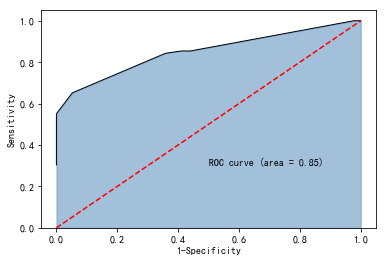

In [9]:
# 导入第三方包
import matplotlib.pyplot as plt
y_score = CART_Class.predict_proba(X_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)
# 计算AUC的值
roc_auc = metrics.auc(fpr,tpr)

# 绘制面积图
plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
# 添加边际线
plt.plot(fpr, tpr, color='black', lw = 1)
# 添加对角线
plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
# 添加文本信息
plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
# 添加x轴与y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
# 显示图形
plt.show()

In [ ]:
# 需要在电脑中安装Graphviz
# https://graphviz.gitlab.io/_pages/Download/Download_windows.html
# 然后将解压文件中的bin设置到环境变量中
# 导入第三方模块
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO
# 绘制决策树
dot_data = StringIO()
export_graphviz(
    decision_tree,
    out_file=dot_data,  
    feature_names=predictors,
    class_names=['Unsurvived','Survived'],  
    # filled=True,
    rounded=True,  
    special_characters=True
)
# 决策树展现
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) 

In [10]:
# 导入第三方包
from sklearn import ensemble
# 构建随机森林
RF_class = ensemble.RandomForestClassifier(n_estimators=200, random_state=1234)
# 随机森林的拟合
RF_class.fit(X_train, y_train)
# 模型在测试集上的预测
RFclass_pred = RF_class.predict(X_test)
# 模型的准确率
print('模型在测试集的预测准确率：\n',metrics.accuracy_score(y_test, RFclass_pred))

模型在测试集的预测准确率：
 0.852017937219731


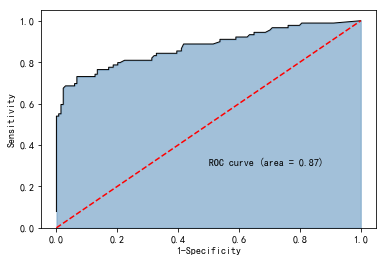

In [11]:
# 计算绘图数据
y_score = RF_class.predict_proba(X_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr,tpr)
# 绘图
plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
plt.plot(fpr, tpr, color='black', lw = 1)
plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

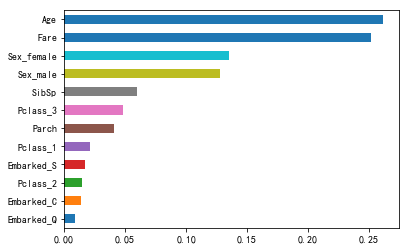

In [12]:
# 变量的重要性程度值
importance = RF_class.feature_importances_
# 构建含序列用于绘图
Impt_Series = pd.Series(importance, index = X_train.columns)
# 对序列排序绘图
Impt_Series.sort_values(ascending = True).plot('barh')
plt.show()